In [8]:
import athena_read
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib

In [2]:
def get_times():
    with open("LinWave.hst") as f:
        data = np.loadtxt(f).T
        times = data[0]
        return times
        
times = get_times()

In [3]:
def isIterable(iterable):
     """Test for iterable-ness."""
     try:
         iter(iterable)
     except TypeError:
         return False
     return True

def isBadIterable(iterable):
     """Return True if it's a 'bad' iterable.

     Note: string's are bad because, when iterated they return 
strings 		    making itterflatten loop infinitely.
     """
     return isinstance(iterable, basestring)

def iterflatten(iterable):
     """Return a flattened iterator."""
     it = iter(iterable)
     for e in it:
         if isIterable(e) and not isBadIterable(e):
             #Recurse into iterators.
             for f in iterflatten(e):
                 yield f
         else:
             yield e

In [4]:
x_faces,y_faces,z_faces,data = athena_read.vtk('LinWave.0161.vtk')
for key in data: print(key)
pr = np.array(data['press'])
print(max(iterflatten(pr)))

press
vel
rho
0.600000858307


In [5]:
def mag(data, type_):
    if type_ == 'vel':
        return np.linalg.norm(data)
    if type_ == 'press' or type_ == 'rho':
        return data
    else: raise ValueError

In [10]:
p = pathlib.Path('.')
nfiles = len(list(p.glob("*.vtk")))

presss = np.zeros(nfiles)
vels   = np.zeros(nfiles)
rhos   = np.zeros(nfiles)
for n in range(nfiles):
    print("-------", n, "------")
    filename = "LinWave.%04i.vtk" %(n)
    x_faces,y_faces,z_faces,data = athena_read.vtk(filename)
    press = data['press']
    vel = data['vel']
    rho = data['rho']
    max_press = 0
    max_vel   = 0
    max_rho   = 0
    
    for i in range(len(z_faces)-1):
        for j in range(len(y_faces)-1):
            for k in range(len(x_faces)-1):
                max_press = max(max_press, mag(press[i,j,k], 'press'))
                max_vel   = max(max_vel  , mag(vel[i,j,k],   'vel'))
                max_rho   = max(max_rho  , mag(rho[i,j,k],   'rho'))
    presss[n] = max_press
    vels[n]   = max_vel
    rhos[n]   = max_rho

('-------', 0, '------')
('-------', 1, '------')
('-------', 2, '------')
('-------', 3, '------')
('-------', 4, '------')
('-------', 5, '------')
('-------', 6, '------')
('-------', 7, '------')
('-------', 8, '------')
('-------', 9, '------')
('-------', 10, '------')
('-------', 11, '------')
('-------', 12, '------')
('-------', 13, '------')
('-------', 14, '------')
('-------', 15, '------')
('-------', 16, '------')
('-------', 17, '------')
('-------', 18, '------')
('-------', 19, '------')
('-------', 20, '------')
('-------', 21, '------')
('-------', 22, '------')
('-------', 23, '------')
('-------', 24, '------')
('-------', 25, '------')
('-------', 26, '------')
('-------', 27, '------')
('-------', 28, '------')
('-------', 29, '------')
('-------', 30, '------')
('-------', 31, '------')
('-------', 32, '------')
('-------', 33, '------')
('-------', 34, '------')
('-------', 35, '------')
('-------', 36, '------')
('-------', 37, '------')
('-------', 38, '-----

ValueError: x and y must have same first dimension, but have shapes (458,) and (358,)

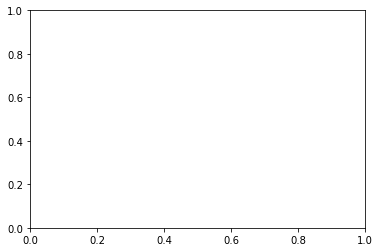

In [7]:
plt.plot(times, rhos)
plt.show()

In [ ]:
rhos

In [ ]:
times